# Introduction

### The dataset movielens

This dataset (movielens) describes 5-star rating and free-text tagging activity from [MovieLens](http://movielens.org), a movie recommendation service. It contains 25000095 ratings and 1093360 tag applications across 62423 movies. These data were created by 162541 users between January 09, 1995 and November 21, 2019. This dataset was generated on November 21, 2019.

Users were selected at random for inclusion. Each user is represented by an id, and no other information on the user is provided.

The data are contained in the files `genome-scores.csv`, `genome-tags.csv`, `links.csv`, `movies.csv`, `ratings.csv` and `tags.csv`.

This and other GroupLens data sets are publicly available for download at <http://grouplens.org/datasets/>.

In this notebook, I will be using two CSV files:

* **ratings.csv :** *userId*,*movieId*,*rating*, *timestamp*
* **movies.csv :** *movieId*, *title*, *genres*

### Aims and objectives

The purpose of this notebook is to find out the:

* mean ratings of each genre
* number of releases of each genre
* correlation between genre rating and genre release?

and also have answers to questions like:

* what is the most released movie genre?
* what is the most rated movie genre?
* will the general rating of a movie genre increase with increase in the number of its releases?


### Importing python libraries

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt


### Files in movielens

Let us look at the files in this dataset using the UNIX command ls.

In [2]:
!ls ./movielens


Icon_
README.txt
genome-scores.csv
genome-tags.csv
links.csv
movies.csv
ratings.csv
tags.csv


### Data ingestion

Using the *read_csv* function in pandas, I will ingest these two files.

In [3]:
movies = pd.read_csv('./movielens/movies.csv', sep=',')
ratings = pd.read_csv('./movielens/ratings.csv', sep=',', parse_dates=['timestamp'])


### The data provided has no missing values

In [4]:
print(movies.isnull().any().any())# this shows False as there are no NaN
print(ratings.isnull().any().any())# this shows False as there are no NaN


False
False


In [5]:
print(f"{type(movies)}\n Shape of movies dataframe is:{movies.shape}")

# printing five randomly selected rows of the movies dataset
movies.sample(n=5,random_state=111)


<class 'pandas.core.frame.DataFrame'>
 Shape of movies dataframe is:(62423, 3)


,movieId,title,genres
16360,86536,High School (1968),Documentary
27952,130566,Deadly Encounter (1982),Action|Drama|Thriller
39589,157551,Billa (2007),Action|Romance|Thriller
16216,85728,"Second Civil War, The (1997)",Comedy|Drama
48575,176951,Mülheim/Ruhr (1964),Documentary


In [6]:
print(f"Shape of movies dataframe is:{movies.shape}")

# printing five randomly selected rows of the ratings dataset
ratings.sample(n=5,random_state=111)


Shape of movies dataframe is:(62423, 3)


,userId,movieId,rating,timestamp
22665120,147313,67734,3.0,1524618277
9656559,62681,5463,4.5,1054385853
3240876,21390,3408,3.0,968622105
4790417,31279,56339,3.5,1572008353
14660786,94836,8970,3.5,1129788905


# Generating Dataframes

### number_of_release

In [7]:
# defining function that will return a dataframe with the genre and release as columns

def  count_genre(x):
    # splitting the genres using the delimiter '|'
    data_plot = movies[x].str.cat(sep = '|')
    data = pd.Series(data_plot.split('|'))
    info = data.value_counts(ascending=False)
    info = data.value_counts(ascending=False).apply(pd.Series)
    infos=info.reset_index() # resetting the index
    infos.columns = ['genres','releases']# giving the columns names
    return infos # this will return the genres and the number of release

number_of_release = count_genre("genres")

#     information on the number_of_release dataframe
number_of_release.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   genres    20 non-null     object
 1   releases  20 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 448.0+ bytes


In [8]:
# printing the dataframe number_of_release 
number_of_release


,genres,releases
0,Drama,25606
1,Comedy,16870
2,Thriller,8654
3,Romance,7719
4,Action,7348
5,Horror,5989
6,Documentary,5605
7,Crime,5319
8,(no genres listed),5062
9,Adventure,4145


### ploting number_of_release

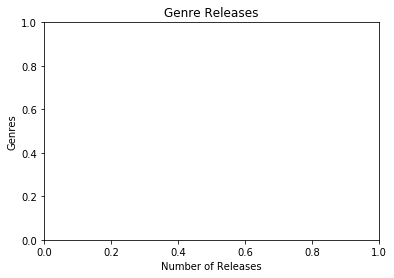

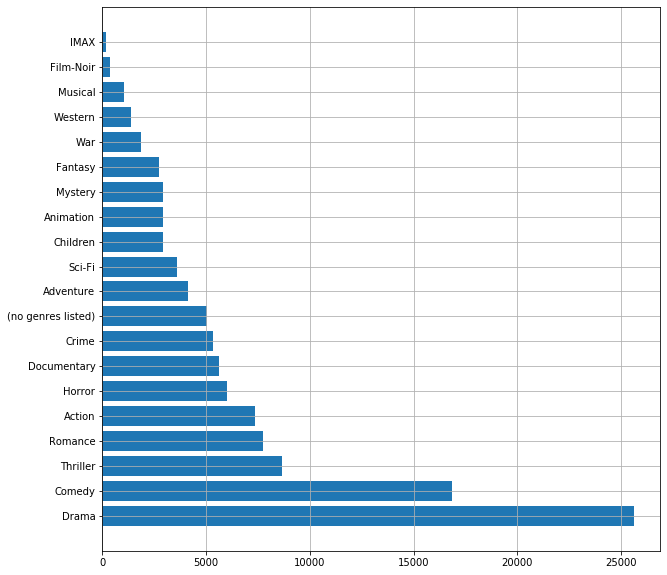

In [9]:
# Label the axes
plt.xlabel('Number of Releases')
plt.ylabel('Genres')
X = number_of_release['genres']
Y =  number_of_release['releases']

#label the figure
plt.title('Genre Releases')
plt.figure(figsize=(10,10))
plt.barh(X,Y)

plt.grid(True)

plt.show()

### mean_genre_ratings

In [10]:
# adding rating to the movies' dataset
movies_with_ratings = movies.assign(rating = ratings["rating"])

# to randomly select 5 samples
movies_with_ratings.sample(n=5,random_state=111)


,movieId,title,genres,rating
16360,86536,High School (1968),Documentary,5.0
27952,130566,Deadly Encounter (1982),Action|Drama|Thriller,3.0
39589,157551,Billa (2007),Action|Romance|Thriller,3.0
16216,85728,"Second Civil War, The (1997)",Comedy|Drama,4.0
48575,176951,Mülheim/Ruhr (1964),Documentary,2.0


In [11]:
import warnings
warnings.filterwarnings("ignore",'This pattern has match groups')
# to determine the mean ratings of each genre

list1 = []; list2 = [];list3 = []
for i,item in enumerate(number_of_release["genres"]):
    connect = movies_with_ratings['genres'].str.contains(item)
    mean_rating = movies_with_ratings[connect]["rating"].mean()
    list1.append(item)
    list2.append(mean_rating)
    list3.append(i)
#     creating a dataframe mean_genre_ratings
    mean_genre_ratings = dict(genres = list1,mean_ratings = list2)
    mean_genre_ratings = pd.DataFrame(mean_genre_ratings, index = list3)
    
#     information on the mean_genre_ratings dataframe
mean_genre_ratings.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   genres        20 non-null     object 
 1   mean_ratings  20 non-null     float64
dtypes: float64(1), object(1)
memory usage: 480.0+ bytes


In [12]:
mean_genre_ratings


,genres,mean_ratings
0,Drama,3.571917
1,Comedy,3.579342
2,Thriller,3.600243
3,Romance,3.567496
4,Action,3.568318
5,Horror,3.603273
6,Documentary,3.615968
7,Crime,3.593251
8,(no genres listed),3.591861
9,Adventure,3.572618


### ploting mean_genre_ratings

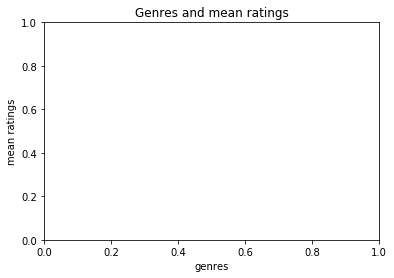

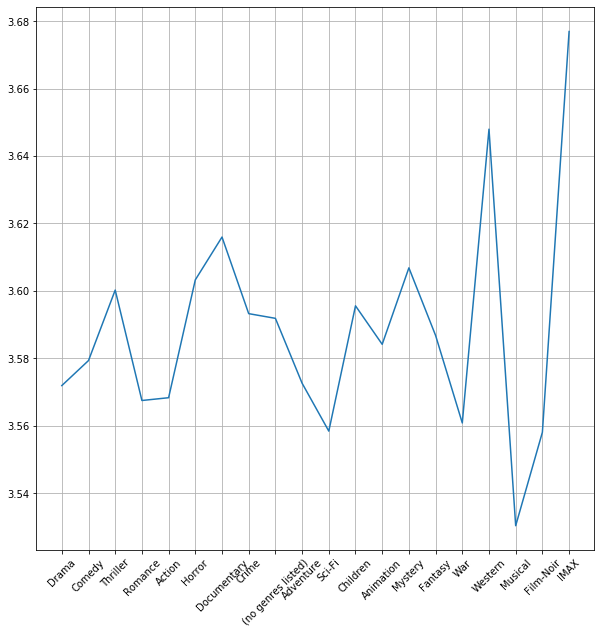

In [13]:
# Label the axes
plt.xlabel('genres')
plt.ylabel('mean ratings')

#label the figure
plt.title('Genres and mean ratings')
plt.figure(figsize=(10,10))
plt.plot(mean_genre_ratings['genres'].values, mean_genre_ratings['mean_ratings'].values)
plt.xticks(rotation=45)

plt.grid(True)

plt.show()

### generally

Now we have generated two important dataframes

* The genres and releases(number_of_release)
* The genres and mean_ratings(mean_genre_ratings)


# Correlation

### Finding the correlation of `releases` and `mean_ratings`

In [14]:
# adding mean ratings to the number_of_release dataframe
genres_with_ratings = number_of_release.assign(mean_ratings=mean_genre_ratings["mean_ratings"])
genres_with_ratings


,genres,releases,mean_ratings
0,Drama,25606,3.571917
1,Comedy,16870,3.579342
2,Thriller,8654,3.600243
3,Romance,7719,3.567496
4,Action,7348,3.568318
5,Horror,5989,3.603273
6,Documentary,5605,3.615968
7,Crime,5319,3.593251
8,(no genres listed),5062,3.591861
9,Adventure,4145,3.572618


In [15]:
# to find out the correlation between release and mean_rating
genres_with_ratings['releases'].corr(genres_with_ratings['mean_ratings'])


-0.17218377081283845

The negative in the value shows that `releases` and `mean_ratings` are negatively correlated.

### Ploting the correlation

In [16]:
# defining a function that will plot the correlation
def plot_scatter(df, x, y):
    fig,axis = plt.subplots()
    # Grid lines, Xticks, Xlabel, Ylabel

    axis.grid(True)
    axis.set_title('Scatter Plot',fontsize=22)
    axis.set_xlabel(x,fontsize=14)
    axis.set_ylabel(y,fontsize=14)

    X = df[x]
    Y = df[y]

    axis.scatter(X, Y)
    plt.show()
    

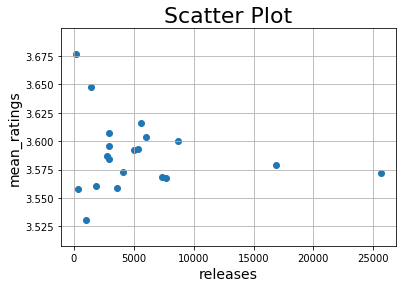

In [17]:
plot_scatter(genres_with_ratings,'releases','mean_ratings')
